## Coding Challenge for the position of Senior Data Scientist at Holmusk
### Submitted by Michel J. Wälti, March 2021

#### Task:
As a part of the recruitment process, we ask all candidates to solve an open-ended problem to give us an opportunity to better understand their approach to problem solving, technical skills etc. Please spend up to a week on the following problem. We should also mention that we encourage the candidate to communicate with us throughout the process, giving us updates and asking questions as necessary. 

Chronic Kidney Disease Dataset Challenge: For this task, you are given a set of longitudinal data (attached) of different lab measurements for patients diagnosed with chronic kidney disease (CKD). Furthermore, you are also given the information whether these patients progress in their CKD stage or not in the future. Using this dataset, you are required to come up with a solution to predict whether a patient will progress in CKD staging given the patient's past longitudinal information.

At the end of one week, we expect you to share your code (github repository) and a document/slides describing your approach and results, insights etc. This position requires strong communication and visualization skills. Your slide design, narrative and content as well your presentation will be judged not only for technical but communication skills as well. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data files
demo_df       = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_demo.csv',index_col="id")
creatinine_df = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_creatinine.csv',index_col="id")
SBP_df        = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_SBP.csv',index_col="id")
DBP_df        = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_DBP.csv',index_col="id")
ldl_df        = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_ldl.csv',index_col="id")
glucose_df    = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_glucose.csv',index_col="id")
HGB_df        = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_HGB.csv',index_col="id")
meds_df       = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_meds.csv')
stage_df      = pd.read_csv('/Users/localadmin/Desktop/dataScienceTask/T_stage.csv',index_col="id")

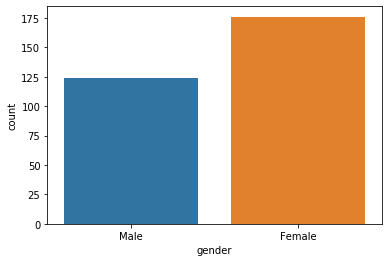

In [3]:
# visualise distribution of demographic data
sns.countplot(demo_df["gender"]);

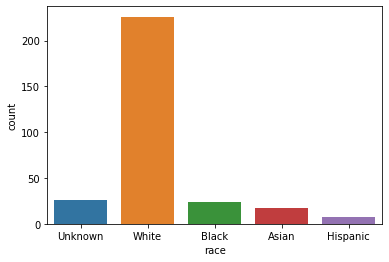

In [4]:
sns.countplot(demo_df["race"]);

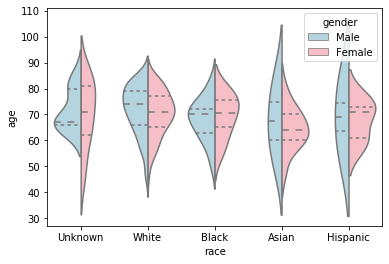

In [5]:
with sns.axes_style(style=None):
    sns.violinplot("race", "age", hue="gender", data=demo_df,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

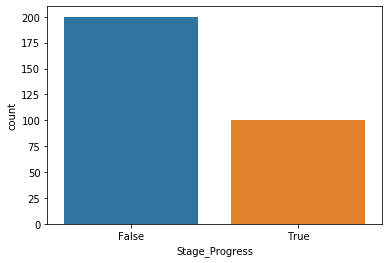

In [6]:
# visualise distribution of outcome variable
sns.countplot(stage_df["Stage_Progress"]);

In [7]:
# cluster patient lab measurements into years (taking median value)

# creatinine
creatinine_df_y1 = creatinine_df[creatinine_df["time"].between(0, 365)].groupby("id").median().drop(columns="time")
creatinine_df_y2 = creatinine_df[creatinine_df["time"].between(366, 730)].groupby("id").median().drop(columns="time")

# systolic blood pressure
SBP_df_y1 = SBP_df[SBP_df["time"].between(0, 365)].groupby("id").median().drop(columns="time")
SBP_df_y2 = SBP_df[SBP_df["time"].between(366, 730)].groupby("id").median().drop(columns="time")

# diastolic blood pressure
DBP_df_y1 = DBP_df[DBP_df["time"].between(0, 365)].groupby("id").median().drop(columns="time")
DBP_df_y2 = DBP_df[DBP_df["time"].between(366, 730)].groupby("id").median().drop(columns="time")

# ldl cholesterol
ldl_df_y1 = ldl_df[ldl_df["time"].between(0, 365)].groupby("id").median().drop(columns="time")
ldl_df_y2 = ldl_df[ldl_df["time"].between(366, 730)].groupby("id").median().drop(columns="time")

# glucose
glucose_df_y1 = glucose_df[glucose_df["time"].between(0, 365)].groupby("id").median().drop(columns="time")
glucose_df_y2 = glucose_df[glucose_df["time"].between(366, 730)].groupby("id").median().drop(columns="time")

# hemoglobin
HGB_df_y1 = HGB_df[HGB_df["time"].between(0, 365)].groupby("id").median().drop(columns="time")
HGB_df_y2 = HGB_df[HGB_df["time"].between(366, 730)].groupby("id").median().drop(columns="time")
HGB_df_y3 = HGB_df[HGB_df["time"].between(731, 1095)].groupby("id").median().drop(columns="time")
HGB_df_y4 = HGB_df[HGB_df["time"].between(1096, 1460)].groupby("id").median().drop(columns="time")

In [8]:
# fill missing values with previous collected value (assume no change in lab measurement)

# fill missing rows with NaN
creatinine_df_y1 = creatinine_df_y1.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
creatinine_df_y2 = creatinine_df_y2.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))

SBP_df_y1 = SBP_df_y1.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
SBP_df_y2 = SBP_df_y2.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))

DBP_df_y1 = DBP_df_y1.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
DBP_df_y2 = DBP_df_y2.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))

ldl_df_y1 = ldl_df_y1.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
ldl_df_y2 = ldl_df_y2.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))

glucose_df_y1 = glucose_df_y1.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
glucose_df_y2 = glucose_df_y2.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))

HGB_df_y1 = HGB_df_y1.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
HGB_df_y2 = HGB_df_y2.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
HGB_df_y3 = HGB_df_y3.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))
HGB_df_y4 = HGB_df_y4.reindex(list(range(demo_df.index.min(),demo_df.index.max()+1)))

# replace NaNs with last data entry
creatinine_df_y2 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(creatinine_df_y1["value"].values,creatinine_df_y2["value"].values)],
                                columns=["value"])
SBP_df_y2 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(SBP_df_y1["value"].values,SBP_df_y2["value"].values)],
                                columns=["value"])
DBP_df_y2 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(DBP_df_y1["value"].values,DBP_df_y2["value"].values)],
                                columns=["value"])
ldl_df_y2 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(ldl_df_y1["value"].values,ldl_df_y2["value"].values)],
                                columns=["value"])
glucose_df_y2 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(glucose_df_y1["value"].values,glucose_df_y2["value"].values)],
                                columns=["value"])
HGB_df_y2 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(HGB_df_y1["value"].values,HGB_df_y2["value"].values)],
                                columns=["value"])
HGB_df_y3 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(HGB_df_y2["value"].values,HGB_df_y3["value"].values)],
                                columns=["value"])
HGB_df_y4 = pd.DataFrame([x if np.isnan(y) else y for x,y in 
                                 zip(HGB_df_y3["value"].values,HGB_df_y4["value"].values)],
                                columns=["value"])

In [9]:
# merge data into one dataframe
full_df = demo_df.copy()
full_df["creatinine_df_y1"] = creatinine_df_y1["value"].values
full_df["creatinine_df_y2"] = creatinine_df_y2["value"].values
full_df["SBP_df_y1"] = SBP_df_y1["value"].values
full_df["SBP_df_y2"] = SBP_df_y2["value"].values
full_df["DBP_df_y1"] = DBP_df_y1["value"].values
full_df["DBP_df_y2"] = DBP_df_y2["value"].values
full_df["ldl_df_y1"] = ldl_df_y1["value"].values
full_df["ldl_df_y2"] = ldl_df_y2["value"].values
full_df["glucose_df_y1"] = glucose_df_y1["value"].values
full_df["glucose_df_y2"] = glucose_df_y2["value"].values
full_df["HGB_df_y1"] = HGB_df_y1["value"].values
full_df["HGB_df_y2"] = HGB_df_y2["value"].values
full_df["HGB_df_y3"] = HGB_df_y3["value"].values
full_df["HGB_df_y4"] = HGB_df_y4["value"].values
full_df["stage_progressing"] = stage_df["Stage_Progress"].values

# check if any missing data left
full_df.isnull().sum()

race                 0
gender               0
age                  0
creatinine_df_y1     0
creatinine_df_y2     0
SBP_df_y1            0
SBP_df_y2            0
DBP_df_y1            0
DBP_df_y2            0
ldl_df_y1            0
ldl_df_y2            0
glucose_df_y1        0
glucose_df_y2        0
HGB_df_y1            0
HGB_df_y2            0
HGB_df_y3            0
HGB_df_y4            0
stage_progressing    0
dtype: int64

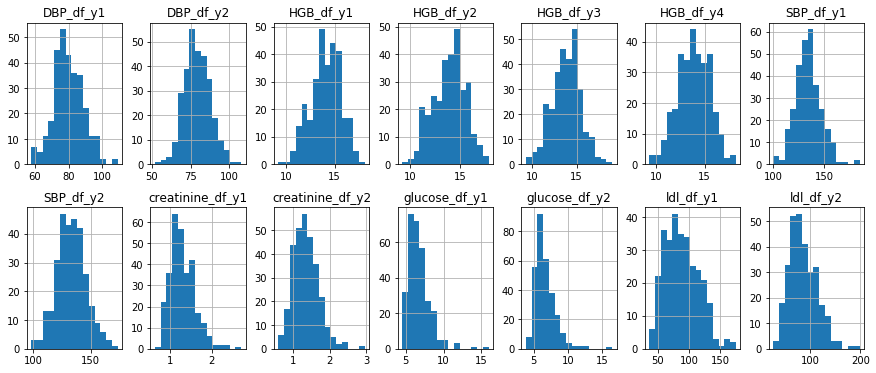

In [10]:
# check distributions of the numerical columns
numerical = ["creatinine_df_y1","creatinine_df_y2",
             "SBP_df_y1","SBP_df_y2",
             "DBP_df_y1","DBP_df_y2",
             "ldl_df_y1","ldl_df_y2",
             "glucose_df_y1","glucose_df_y2",
             "HGB_df_y1","HGB_df_y2","HGB_df_y3","HGB_df_y4"]
full_df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 7));

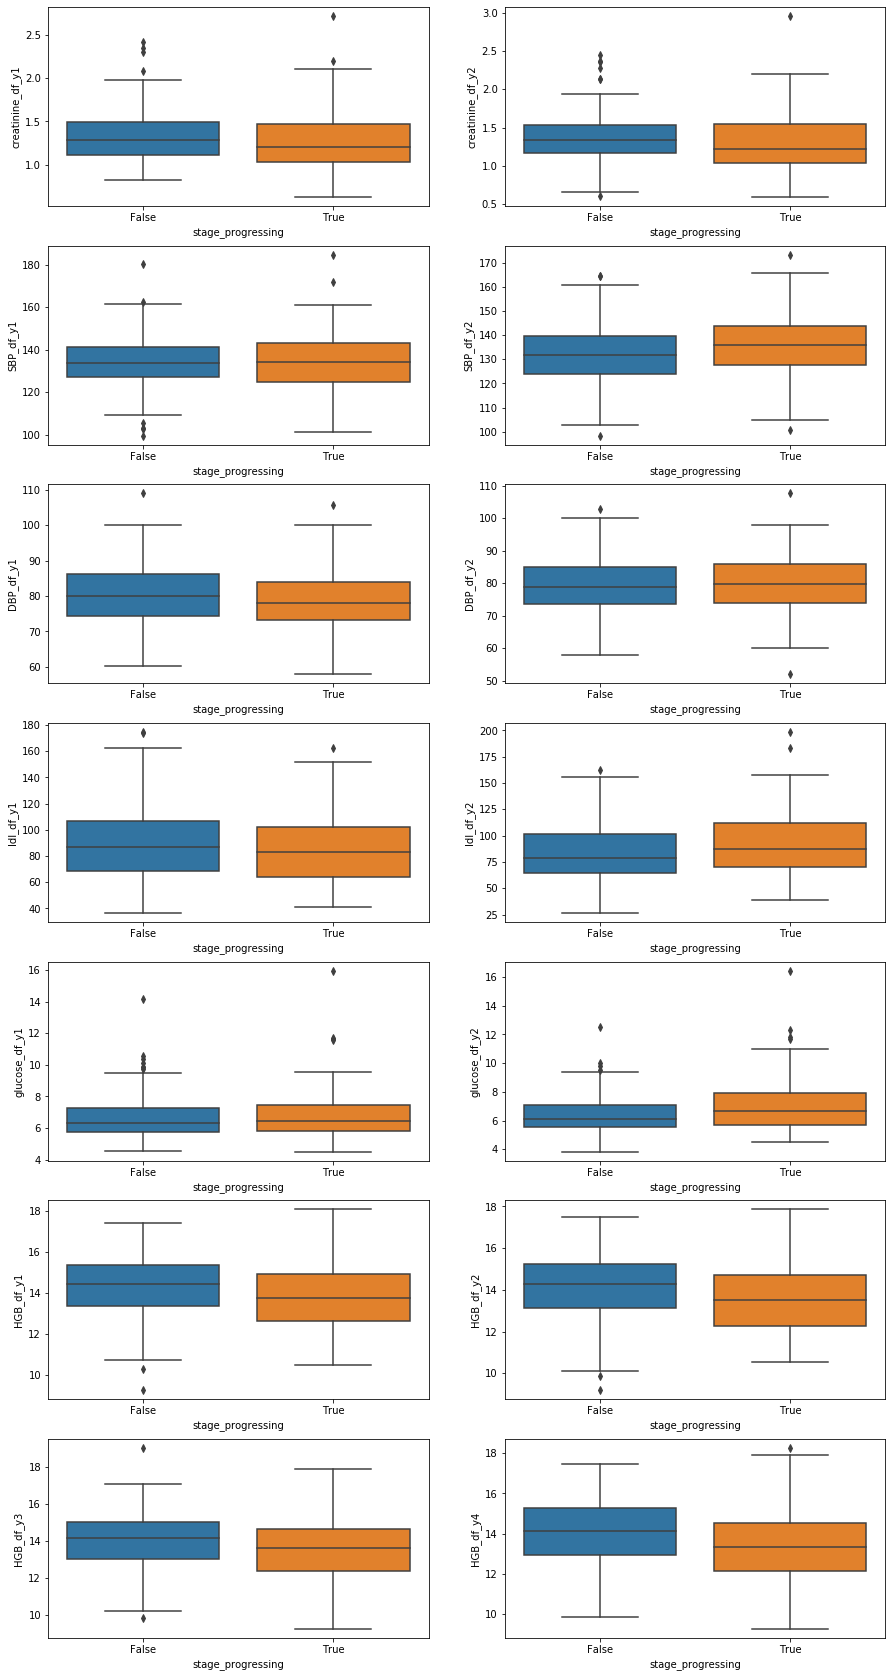

In [11]:
# looking at relationships between lab data and outcome variable
fig, ax = plt.subplots(7, 2, figsize=(15, 30))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x="stage_progressing", y=var, data=full_df, ax=subplot)

### Assign comorbidities

#### The three most common comorbidities are hypertension, diabetes, and hyperlipidemia:

Hypertension is defined as having a systolic blood pressure (SBP) of ≥140 mmHg or 
a diastolic blood pressure (DBP) of ≥90 mmHg, or being on antihypertensive medication. 

Diabetes Mellitus was defined as having a casual blood glucose level (glucose) of ≥200 mg/dL (= 11.1 mmol/l) or 
being on antidiabetic medication. 

Hyperlipidemia was defined as having a serum LDL level (ldl) of ≥140 mg/dL or being on lipid-lowering medication.

In [12]:
# meds used by patients in the data
antihypertensive_meds = ["atenolol","carvedilol","bisoprolol","irbesartan",
                         "labetalol","losartan","metoprolol","nebivolol",
                         "olmesartan","propranolol","telmisartan","valsartan"]
antidiabetic_meds = ["canagliflozin","dapagliflozin","metformin"]
liplowering_meds = ["atorvastatin","lovastatin","pitavastatin",
                    "pravastatin","rosuvastatin","simvastatin"]

In [13]:
# check if patient is on medication or has lab measurements exceeding thresholds for comorbidities

# year 1
meds_df_y1 = meds_df[meds_df["start_day"].between(0, 365)]

# initiate lists
comorb_hypertension_y1 = []
comorb_diabetes_y1 = []
comorb_hyperlipidemia_y1 = []

# sort medication data by patient ids
meds_df_id_y1 = pd.DataFrame(meds_df_y1.groupby("id")[["drug"]].apply(lambda x: x.values.tolist()),columns=["drugs"])
meds_df_id_y1 = meds_df_id_y1.reset_index()

# assign rows for patients without medication data
list_demo_ids = list(range(demo_df.index.min(),demo_df.index.max()+1))
list_meds_df_id_y1 = meds_df_id_y1["id"].values
missing_ids = np.setdiff1d(list_demo_ids,list_meds_df_id_y1)
for ind in missing_ids:
    new_df = pd.DataFrame([[ind,"NaN"]], columns=list(meds_df_id_y1.columns))
    meds_df_id_y1 = meds_df_id_y1.append(new_df)
meds_df_id_y1 = meds_df_id_y1.sort_values(by="id")
meds_df_id_y1 = meds_df_id_y1.set_index(["id"])

# loop through medication data and lab measurement data
for pat_med_list,sbp,dbp,ldl,glucose in zip(meds_df_id_y1["drugs"], 
                                            SBP_df_y1["value"], 
                                            DBP_df_y1["value"],
                                            ldl_df_y1["value"],
                                            glucose_df_y1["value"]):
    
    # flatten list
    pat_med_flat_list = [item for sublist in pat_med_list for item in sublist]
    
    # check hypertension
    if any(item in pat_med_flat_list for item in antihypertensive_meds) \
    or (sbp >= 140)\
    or (dbp >= 90):
        comorb_hypertension_y1 = np.append(comorb_hypertension_y1,1)
    else:
        comorb_hypertension_y1 = np.append(comorb_hypertension_y1,0)
    
    # check diabetes
    if any(item in pat_med_flat_list for item in antidiabetic_meds) \
    or (glucose >= 11.1):
        comorb_diabetes_y1 = np.append(comorb_diabetes_y1,1)
    else:
        comorb_diabetes_y1 = np.append(comorb_diabetes_y1,0)
        
    # check hyperlipidemia
    if any(item in pat_med_flat_list for item in liplowering_meds) \
    or (ldl >= 140):
        comorb_hyperlipidemia_y1 = np.append(comorb_hyperlipidemia_y1,1)
    else:
        comorb_hyperlipidemia_y1 = np.append(comorb_hyperlipidemia_y1,0)
        
# year 2
meds_df_y2 = meds_df[meds_df["end_day"].between(366, 730)]

# initiate lists
comorb_hypertension_y2 = []
comorb_diabetes_y2 = []
comorb_hyperlipidemia_y2 = []

# sort medication data by patient ids
meds_df_id_y2 = pd.DataFrame(meds_df_y2.groupby("id")[["drug"]].apply(lambda x: x.values.tolist()),columns=["drugs"])
meds_df_id_y2 = meds_df_id_y2.reset_index()

# assign rows for patients without medication data
list_demo_ids = list(range(demo_df.index.min(),demo_df.index.max()+1))
list_meds_df_id_y2 = meds_df_id_y2["id"].values
missing_ids = np.setdiff1d(list_demo_ids,list_meds_df_id_y2)
for ind in missing_ids:
    new_df = pd.DataFrame([[ind,"NaN"]], columns=list(meds_df_id_y2.columns))
    meds_df_id_y2 = meds_df_id_y2.append(new_df)
meds_df_id_y2 = meds_df_id_y2.sort_values(by="id")
meds_df_id_y2 = meds_df_id_y2.set_index(["id"])

# loop through medication data and lab measurement data
for pat_med_list,sbp,dbp,ldl,glucose in zip(meds_df_id_y2["drugs"], 
                                            SBP_df_y2["value"], 
                                            DBP_df_y2["value"],
                                            ldl_df_y2["value"],
                                            glucose_df_y2["value"]):
    
    # flatten list
    pat_med_flat_list = [item for sublist in pat_med_list for item in sublist]
    
    # check hypertension
    if any(item in pat_med_flat_list for item in antihypertensive_meds) \
    or (sbp >= 140)\
    or (dbp >= 90):
        comorb_hypertension_y2 = np.append(comorb_hypertension_y2,1)
    else:
        comorb_hypertension_y2 = np.append(comorb_hypertension_y2,0)
    
    # check diabetes
    if any(item in pat_med_flat_list for item in antidiabetic_meds) \
    or (glucose >= 11.1):
        comorb_diabetes_y2 = np.append(comorb_diabetes_y2,1)
    else:
        comorb_diabetes_y2 = np.append(comorb_diabetes_y2,0)
        
    # check hyperlipidemia
    if any(item in pat_med_flat_list for item in liplowering_meds) \
    or (ldl >= 140):
        comorb_hyperlipidemia_y2 = np.append(comorb_hyperlipidemia_y2,1)
    else:
        comorb_hyperlipidemia_y2 = np.append(comorb_hyperlipidemia_y2,0)

In [14]:
# prevalence of comorbidities
print("comorb_hypertension_y1:   {}%".format(round(100*sum(comorb_hypertension_y1)/len(comorb_hypertension_y1),2)))
print("comorb_hypertension_y2:   {}%".format(round(100*sum(comorb_hypertension_y2)/len(comorb_hypertension_y2),2)))
print("comorb_diabetes_y1:       {}%".format(round(100*sum(comorb_diabetes_y1)/len(comorb_diabetes_y1),2)))
print("comorb_diabetes_y2:       {}%".format(round(100*sum(comorb_diabetes_y2)/len(comorb_diabetes_y2),2)))
print("comorb_hyperlipidemia_y1: {}%".format(round(100*sum(comorb_hyperlipidemia_y1)/len(comorb_hyperlipidemia_y1),2)))
print("comorb_hyperlipidemia_y2: {}%".format(round(100*sum(comorb_hyperlipidemia_y2)/len(comorb_hyperlipidemia_y2),2)))

comorb_hypertension_y1:   70.0%
comorb_hypertension_y2:   64.67%
comorb_diabetes_y1:       38.67%
comorb_diabetes_y2:       35.67%
comorb_hyperlipidemia_y1: 71.33%
comorb_hyperlipidemia_y2: 72.33%


In [15]:
# add columns to full dataframe
full_df["comorb_hypertension_y1"] = comorb_hypertension_y1
full_df["comorb_hypertension_y2"] = comorb_hypertension_y2
full_df["comorb_diabetes_y1"] = comorb_diabetes_y1
full_df["comorb_diabetes_y2"] = comorb_diabetes_y2
full_df["comorb_hyperlipidemia_y1"] = comorb_hyperlipidemia_y1
full_df["comorb_hyperlipidemia_y2"] = comorb_hyperlipidemia_y2

# check if any missing data left
full_df.isnull().sum()

race                        0
gender                      0
age                         0
creatinine_df_y1            0
creatinine_df_y2            0
SBP_df_y1                   0
SBP_df_y2                   0
DBP_df_y1                   0
DBP_df_y2                   0
ldl_df_y1                   0
ldl_df_y2                   0
glucose_df_y1               0
glucose_df_y2               0
HGB_df_y1                   0
HGB_df_y2                   0
HGB_df_y3                   0
HGB_df_y4                   0
stage_progressing           0
comorb_hypertension_y1      0
comorb_hypertension_y2      0
comorb_diabetes_y1          0
comorb_diabetes_y2          0
comorb_hyperlipidemia_y1    0
comorb_hyperlipidemia_y2    0
dtype: int64

### Estimate CKD stage by calculating eGFRs:

#### Estimated glomerular filtration rates (eGFRs) calculation:

if white male:
$eGFR = 141 * min(creatinine/0.9 , 1)^{-0.411} * max(creatinine/0.9 , 1)^{-1.209} * 0.993^{age}$

if white female:
$eGFR = 141 * min(creatinine/0.7 , 1)^{-0.329} * max(creatinine/0.7 , 1)^{-1.209} * 0.993^{age} * 1.018$

if non-white male:
$eGFR = 141 * min(creatinine/0.9 , 1)^{-0.411} * max(creatinine/0.9 , 1)^{-1.209} * 0.993^{age} * 1.159$

if non-white female:
$eGFR = 141 * min(creatinine/0.7 , 1)^{-0.329} * max(creatinine/0.7 , 1)^{-1.209} * 0.993^{age} * 1.018 * 1.159$

#### CKD stages:
- Stage 1: eGFR >= 90
- Stage 2: 60 <= eGFR < 90
- Stage 3: 30 <= eGFR < 60   
- Stage 4: 15 < eGFR < 30
- Stage 5: eGFR <= 15

In [16]:
# calculating estimated CKD stages for each patient

# year 1
creatinine_df_y1 = pd.merge(demo_df, creatinine_df_y1, left_index=True, right_index=True)

# initiate list
ckd_stage_y1 = []

# loop through patients data
for pat in creatinine_df_y1.values:
    
    # calculate eGFR
    if pat[3] > 0:
        if pat[1] == "Male" and pat[0] != "Black": # for unknown race, assume not black
            eGFR = 141 * min(pat[3]/0.9 , 1)**-0.411 * max(pat[3]/0.9 , 1)**-1.209 * 0.993**pat[2]
        elif pat[1] == "Female" and pat[0] != "Black":
            eGFR = 141 * min(pat[3]/0.7 , 1)**-0.329 * max(pat[3]/0.7 , 1)**-1.209 * 0.993**pat[2] * 1.018
        elif pat[1] == "Male" and pat[0] == "Black":
            eGFR = 141 * min(pat[3]/0.9 , 1)**-0.411 * max(pat[3]/0.9 , 1)**-1.209 * 0.993**pat[2] * 1.159
        elif pat[1] == "Female" and pat[0] == "Black":
            eGFR = 141 * min(pat[3]/0.7 , 1)**-0.329 * max(pat[3]/0.7 , 1)**-1.209 * 0.993**pat[2] * 1.018 * 1.159

        # assign CKD stage
        if eGFR >= 90:
            ckd_stage_y1 = np.append(ckd_stage_y1,1)
        elif 60 <= eGFR < 90:
            ckd_stage_y1 = np.append(ckd_stage_y1,2)
        elif 30 <= eGFR < 60:
            ckd_stage_y1 = np.append(ckd_stage_y1,3)
        elif 15 < eGFR < 30:
            ckd_stage_y1 = np.append(ckd_stage_y1,4)
        elif eGFR <= 15:
            ckd_stage_y1 = np.append(ckd_stage_y1,5)
            
    else:
        ckd_stage_y1 = np.append(ckd_stage_y1,"NaN")
        
ckd_stage_y1 = pd.DataFrame(ckd_stage_y1,columns=["value"])


# year 2
creatinine_df_y2 = pd.merge(demo_df, creatinine_df_y2, left_index=True, right_index=True)

# initiate list
ckd_stage_y2 = []

# loop through patients data
for pat in creatinine_df_y2.values:
    
    # calculate eGFR
    if pat[3] > 0:
        if pat[1] == "Male" and pat[0] != "Black": # for unknown race, assume not black
            eGFR = 141 * min(pat[3]/0.9 , 1)**-0.411 * max(pat[3]/0.9 , 1)**-1.209 * 0.993**pat[2]
        elif pat[1] == "Female" and pat[0] != "Black":
            eGFR = 141 * min(pat[3]/0.7 , 1)**-0.329 * max(pat[3]/0.7 , 1)**-1.209 * 0.993**pat[2] * 1.018
        elif pat[1] == "Male" and pat[0] == "Black":
            eGFR = 141 * min(pat[3]/0.9 , 1)**-0.411 * max(pat[3]/0.9 , 1)**-1.209 * 0.993**pat[2] * 1.159
        elif pat[1] == "Female" and pat[0] == "Black":
            eGFR = 141 * min(pat[3]/0.7 , 1)**-0.329 * max(pat[3]/0.7 , 1)**-1.209 * 0.993**pat[2] * 1.018 * 1.159
    
        # assign CKD stage
        if eGFR >= 90:
            ckd_stage_y2 = np.append(ckd_stage_y2,1)
        elif 60 <= eGFR < 90:
            ckd_stage_y2 = np.append(ckd_stage_y2,2)
        elif 30 <= eGFR < 60:
            ckd_stage_y2 = np.append(ckd_stage_y2,3)
        elif 15 < eGFR < 30:
            ckd_stage_y2 = np.append(ckd_stage_y2,4)
        elif eGFR <= 15:
            ckd_stage_y2 = np.append(ckd_stage_y2,5)
            
    else:
        ckd_stage_y2 = np.append(ckd_stage_y2,"NaN")
        
ckd_stage_y2 = pd.DataFrame(ckd_stage_y2,columns=["value"])

In [17]:
# replace NaNs with last data entry
ckd_stage_y2 = pd.DataFrame([x if y=="NaN" else y for x,y in zip(ckd_stage_y1["value"],ckd_stage_y2["value"])],columns=["value"])

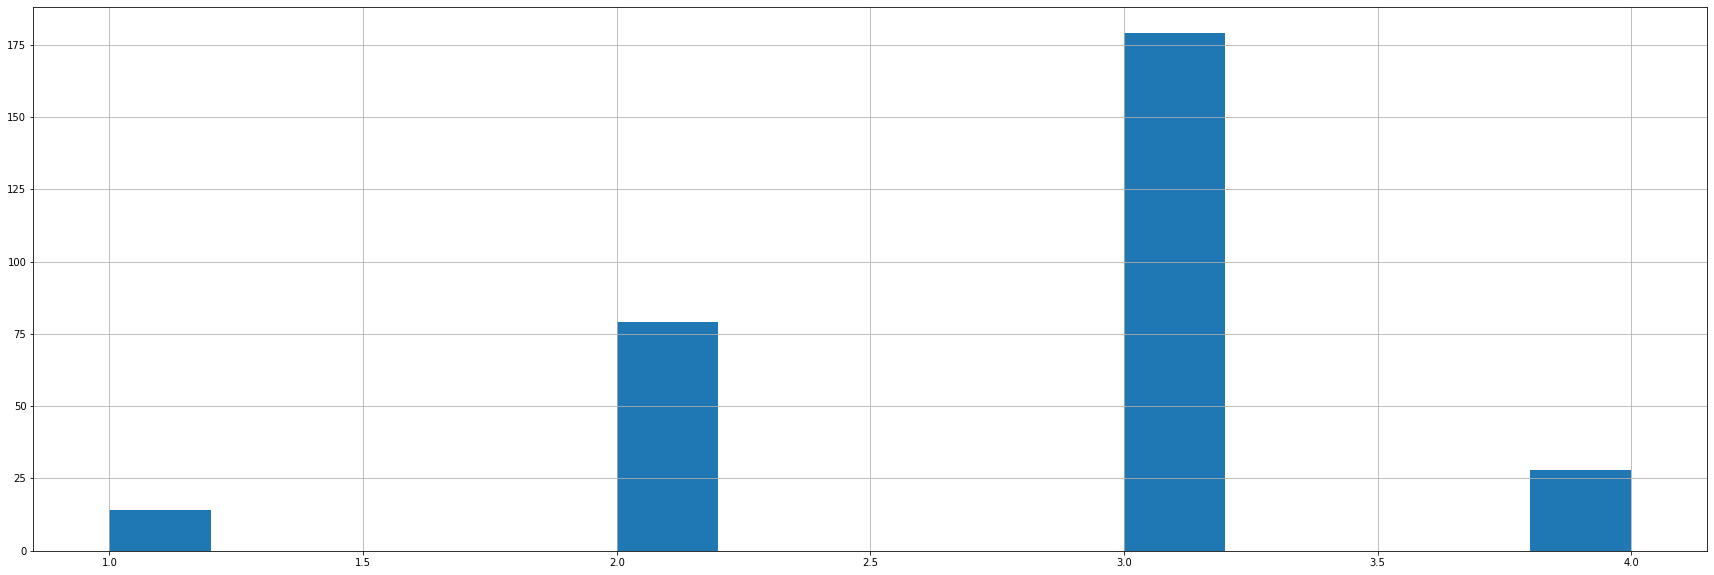

In [18]:
# look at distribution of ckd stages
ckd_stage_y1["value"].hist(bins=15, figsize=(30, 10))

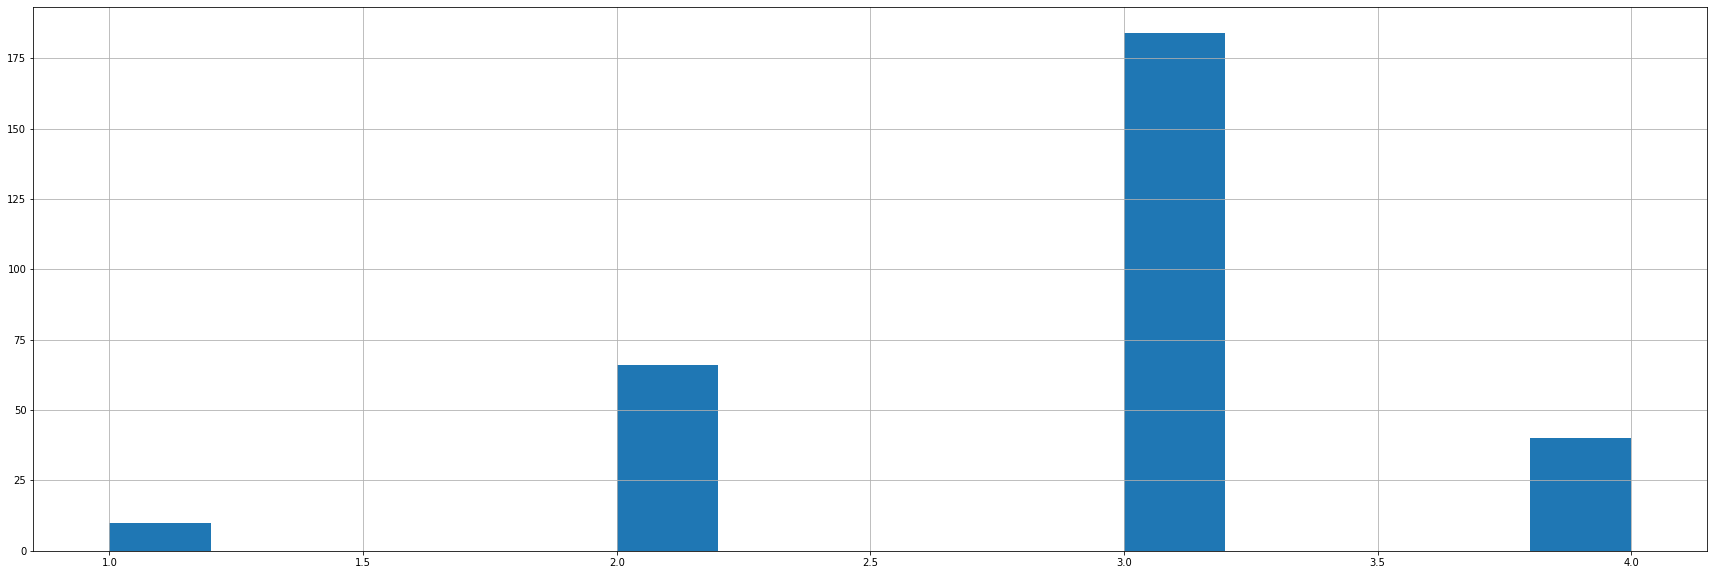

In [19]:
# look at distribution of ckd stages
ckd_stage_y2["value"].hist(bins=15, figsize=(30, 10))

In [20]:
# add columns to full dataframe
full_df["ckd_stage_y1"] = ckd_stage_y1["value"]
full_df["ckd_stage_y2"] = ckd_stage_y2["value"]

# move outcome variable to end of dataframe
df_stage_progressing = full_df["stage_progressing"].copy()
full_df = full_df.drop(columns="stage_progressing")
full_df["stage_progressing"] = df_stage_progressing

In [21]:
# convert the categorical features into numeric attributes
full_df["gender"] = [1 if x=="Male" else 0 for x in full_df["gender"].values]
full_df["race"] = [1 if x=="White" else 0 for x in full_df["race"].values]
full_df["stage_progressing"] = [1 if x==True else 0 for x in full_df["stage_progressing"].values]

In [22]:
# add more features (progression between years for test values)
full_df = full_df.drop(columns="stage_progressing")
full_df["progressing_hgb"] = [1 if x<y else 0 for x,y in zip(full_df["HGB_df_y1"].values,full_df["HGB_df_y4"].values)]
full_df["progressing_ckd_stage"] = [1 if x<y else 0 for x,y in zip(full_df["ckd_stage_y1"].values,full_df["ckd_stage_y2"].values)]
full_df["progressing_hypertension"] = [1 if x<y else 0 for x,y in zip(full_df["comorb_hypertension_y1"].values,full_df["comorb_hypertension_y2"].values)]
full_df["progressing_diabetes"] = [1 if x<y else 0 for x,y in zip(full_df["comorb_diabetes_y1"].values,full_df["comorb_diabetes_y2"].values)]
full_df["progressing_hyperlipidemia"] = [1 if x<y else 0 for x,y in zip(full_df["comorb_hyperlipidemia_y1"].values,full_df["comorb_hyperlipidemia_y2"].values)]
full_df["progressing_creatinine"] = [1 if x<y else 0 for x,y in zip(full_df["creatinine_df_y1"].values,full_df["creatinine_df_y2"].values)]
full_df["progressing_sbp"] = [1 if x<y else 0 for x,y in zip(full_df["SBP_df_y1"].values,full_df["SBP_df_y2"].values)]
full_df["progressing_dbp"] = [1 if x<y else 0 for x,y in zip(full_df["DBP_df_y1"].values,full_df["DBP_df_y2"].values)]
full_df["progressing_ldl"] = [1 if x<y else 0 for x,y in zip(full_df["ldl_df_y1"].values,full_df["ldl_df_y2"].values)]
full_df["progressing_glucose"] = [1 if x<y else 0 for x,y in zip(full_df["glucose_df_y1"].values,full_df["glucose_df_y2"].values)]
full_df["has_comorbidity_y1"] = [1 if max(x,y,z)>0 else 0 for x,y,z in zip(full_df["comorb_hypertension_y1"].values,full_df["comorb_diabetes_y1"].values,full_df["comorb_hyperlipidemia_y1"].values)]
full_df["has_comorbidity_y2"] = [1 if max(x,y,z)>0 else 0 for x,y,z in zip(full_df["comorb_hypertension_y2"].values,full_df["comorb_diabetes_y2"].values,full_df["comorb_hyperlipidemia_y2"].values)]
full_df["stage_progressing"] = stage_df["Stage_Progress"].values

In [23]:
# check if any missing data left
full_df.isnull().sum()

race                          0
gender                        0
age                           0
creatinine_df_y1              0
creatinine_df_y2              0
SBP_df_y1                     0
SBP_df_y2                     0
DBP_df_y1                     0
DBP_df_y2                     0
ldl_df_y1                     0
ldl_df_y2                     0
glucose_df_y1                 0
glucose_df_y2                 0
HGB_df_y1                     0
HGB_df_y2                     0
HGB_df_y3                     0
HGB_df_y4                     0
comorb_hypertension_y1        0
comorb_hypertension_y2        0
comorb_diabetes_y1            0
comorb_diabetes_y2            0
comorb_hyperlipidemia_y1      0
comorb_hyperlipidemia_y2      0
ckd_stage_y1                  0
ckd_stage_y2                  0
progressing_hgb               0
progressing_ckd_stage         0
progressing_hypertension      0
progressing_diabetes          0
progressing_hyperlipidemia    0
progressing_creatinine        0
progress

In [24]:
# descriptions of all variables
pd.options.display.max_columns = full_df.shape[1]
print(full_df.describe())

             race      gender         age  creatinine_df_y1  creatinine_df_y2  \
count  300.000000  300.000000  300.000000        300.000000        300.000000   
mean     0.753333    0.413333   70.383333          1.302167          1.336733   
std      0.431791    0.493254    9.247058          0.314770          0.340595   
min      0.000000    0.000000   46.000000          0.625000          0.590000   
25%      1.000000    0.000000   64.000000          1.080000          1.090000   
50%      1.000000    0.000000   71.000000          1.265000          1.292500   
75%      1.000000    1.000000   78.000000          1.490000          1.540000   
max      1.000000    1.000000   86.000000          2.720000          2.960000   

        SBP_df_y1   SBP_df_y2   DBP_df_y1   DBP_df_y2   ldl_df_y1   ldl_df_y2  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   134.153917  133.290483   79.884533   79.316183   88.565533   85.950283   
std     12.753333   12.6790

### Test various ML models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

In [26]:
# prepare data
clf_df = full_df.copy()

# separate input features (X) and target variable (y)
X             = clf_df[clf_df.columns[:-1]].to_numpy()
feature_names = list(clf_df.iloc[:,0:-1])
y             = clf_df["stage_progressing"].to_numpy()
label_names   = list(clf_df.iloc[:,-1:])
label_names   = ["progressing","not progressing"]

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# add weighting to the classes of the dependent variables (because they are unbalanced)
weight_of_class0 = 1
weight_of_class1 = int(1 / (sum(y_train)/len(y_train)))
balanced_weights = [weight_of_class0 if x==0 else weight_of_class1 for x in y_train]

LR: 0.712500 (0.095833)
KNN: 0.645833 (0.072768)
CART: 0.654167 (0.076942)
NB: 0.641667 (0.121049)
SVM: 0.666667 (0.000000)
RF: 0.712500 (0.043501)


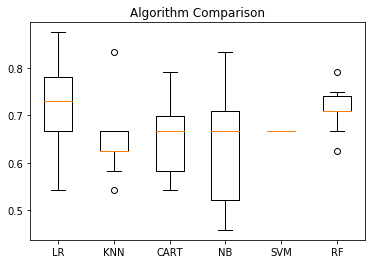

In [27]:
# define algorithms
models = []
models.append(("LR", LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma='auto')))
models.append(("RF", RandomForestClassifier()))

# evaluate each model
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# make plot
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### Random Forest Classifier

In [37]:
# make predictions
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# evaluate predictions
print("Accuracy:  ",metrics.accuracy_score(y_test, predictions))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
#print("AUC:       ",metrics.auc(fpr,tpr))
#print("")

# generate confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix: \n", conf_mat)

Accuracy:   0.7
Confusion Matrix: 
 [[37  3]
 [15  5]]


### Select features

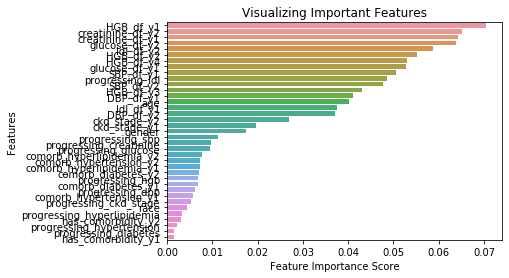

In [29]:
# find feature importance
feature_imp = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [30]:
# prepare data
clf_df = full_df.copy()

# take most important features
feature_names = feature_imp.index[:15]

# separate input features (X) and target variable (y)
X             = clf_df[feature_names].to_numpy()
y             = clf_df["stage_progressing"].to_numpy()
label_names   = list(clf_df.iloc[:,-1:])
label_names   = ["progressing","not progressing"]

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# add weighting to the classes of the dependent variables (because they are unbalanced)
weight_of_class0 = 1
weight_of_class1 = int(1 / (sum(y_train)/len(y_train)))
balanced_weights = [weight_of_class0 if x==0 else weight_of_class1 for x in y_train]

In [31]:
# create random forest classifier: 
rf_Model = RandomForestClassifier(random_state=0,
                             class_weight={0:weight_of_class0, 1: weight_of_class1})

# train the model using the training sets
rf_Model.fit(X_train,y_train)
y_pred = rf_Model.predict(X_test)

print("Accuracy:  ",metrics.accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
#print("AUC:       ",metrics.auc(fpr,tpr))
#print("")

# generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_mat)

Accuracy:   0.6666666666666666
Confusion Matrix: 
 [[36  4]
 [16  4]]


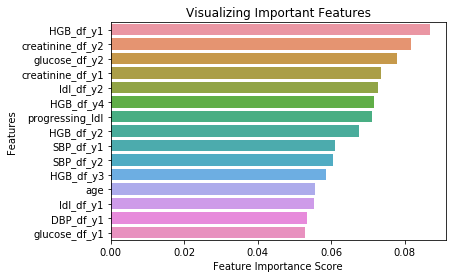

In [32]:
# show feature importance
feature_imp = pd.Series(rf_Model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### Hyperparamter tuning with CV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf_Model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight={0: 1, 1: 3},
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
       

In [34]:
rf_random.best_params_

{'n_estimators': 560,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [35]:
from sklearn.model_selection import GridSearchCV

# create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [100,200,400],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [1,2,3],
              'max_features': [2, 3],
              'max_depth': [40,50,60],
              'bootstrap': [True]}

# create a based model
rf_Model = RandomForestClassifier()

# instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [36]:
y_pred = grid_search.predict(X_test)

print("Accuracy:  ",metrics.accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
#print("AUC:       ",metrics.auc(fpr,tpr))
#print("")

# generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_mat)

Accuracy:   0.7166666666666667
Confusion Matrix: 
 [[37  3]
 [14  6]]
